In [1]:
# Import the libraries we need
import pandas as pd  # "Excel" for Python
import seaborn as sns # For making pretty charts
import matplotlib.pyplot as plt # For basic plotting setup

print("Tools loaded!")

Tools loaded!


In [9]:
import pandas as pd

# --- 1. Create Products Data ---
products_data = {
    'product_id': [101, 102, 103, 104, 105, 106],
    'product_name': ['Laptop Pro X', 'Acoustic Headset', 'Ergonomic Mouse', '4K Monitor', 'Portable Charger', 'Generic Cable'],
    'category': ['Electronics', 'Electronics', 'Accessories', 'Electronics', 'Accessories', 'Accessories'],
    'unit_price': [1200, 150, 60, 400, 40, 10],
    'unit_cost': [800, 50, 20, 250, 15, 2]
}
products = pd.DataFrame(products_data)

# --- 2. Create Customers Data ---
customers_data = {
    'customer_id': [1, 2, 3, 4, 5],
    'customer_name': ['Jane Doe', 'John Smith', 'Alice Johnson', 'Bob Brown', 'Charlie Davis'],
    'region': ['North', 'East', 'West', 'South', 'North']
}
customers = pd.DataFrame(customers_data)

# --- 3. Create Orders Data ---
orders_data = {
    'order_id': [5001, 5002, 5003, 5004, 5005, 5006, 5007, 5008, 5009, 5010],
    'customer_id': [1, 1, 2, 3, 1, 2, 4, 1, 5, 1],
    'product_id': [102, 103, 101, 105, 104, 102, 106, 101, 103, 105],
    'quantity': [2, 1, 1, 5, 2, 3, 10, 1, 2, 2],
    'order_date': ['2023-09-15', '2023-09-20', '2023-10-05', '2023-10-12', '2023-11-01', '2023-11-05', '2023-11-10', '2023-11-15', '2023-11-20', '2023-11-25']
}
orders = pd.DataFrame(orders_data)

print("✅ Success! Data tables 'orders', 'products', and 'customers' created.")
display(orders.head())

✅ Success! Data tables 'orders', 'products', and 'customers' created.


,order_id,customer_id,product_id,quantity,order_date
0,5001,1,102,2,2023-09-15
1,5002,1,103,1,2023-09-20
2,5003,2,101,1,2023-10-05
3,5004,3,105,5,2023-10-12
4,5005,1,104,2,2023-11-01


In [10]:
# Check for missing values (Nulls)
print("Missing values in Orders:")
print(orders.isnull().sum())

# Check data types (Are numbers actually numbers?)
print("\nData Types:")
print(orders.info())

Missing values in Orders:
order_id       0
customer_id    0
product_id     0
quantity       0
order_date     0
dtype: int64

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     10 non-null     int64 
 1   customer_id  10 non-null     int64 
 2   product_id   10 non-null     int64 
 3   quantity     10 non-null     int64 
 4   order_date   10 non-null     object
dtypes: int64(4), object(1)
memory usage: 532.0+ bytes
None


In [11]:
# Join Orders with Products (on product_id)
merged_df = pd.merge(orders, products, on='product_id', how='left')

# Join that result with Customers (on customer_id)
# Note: We are overwriting 'merged_df' to keep adding to the master table
merged_df = pd.merge(merged_df, customers, on='customer_id', how='left')

# Create the "Total Margin" column (Math!)
merged_df['total_margin'] = (merged_df['unit_price'] - merged_df['unit_cost']) * merged_df['quantity']

print("Master Table Created!")
display(merged_df.head())

Master Table Created!


,order_id,customer_id,product_id,quantity,order_date,product_name,category,unit_price,unit_cost,customer_name,region,total_margin
0,5001,1,102,2,2023-09-15,Acoustic Headset,Electronics,150,50,Jane Doe,North,200
1,5002,1,103,1,2023-09-20,Ergonomic Mouse,Accessories,60,20,Jane Doe,North,40
2,5003,2,101,1,2023-10-05,Laptop Pro X,Electronics,1200,800,John Smith,East,400
3,5004,3,105,5,2023-10-12,Portable Charger,Accessories,40,15,Alice Johnson,West,125
4,5005,1,104,2,2023-11-01,4K Monitor,Electronics,400,250,Jane Doe,North,300


In [12]:
# Group by Product Name and Sum the Margin
top_products = merged_df.groupby('product_name')['total_margin'].sum().sort_values(ascending=False).head(5)

print("Top 5 Products by Margin:")
print(top_products)

Top 5 Products by Margin:
product_name
Laptop Pro X        800
Acoustic Headset    500
4K Monitor          300
Portable Charger    175
Ergonomic Mouse     120
Name: total_margin, dtype: int64


/tmp/ipython-input-2117771697.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


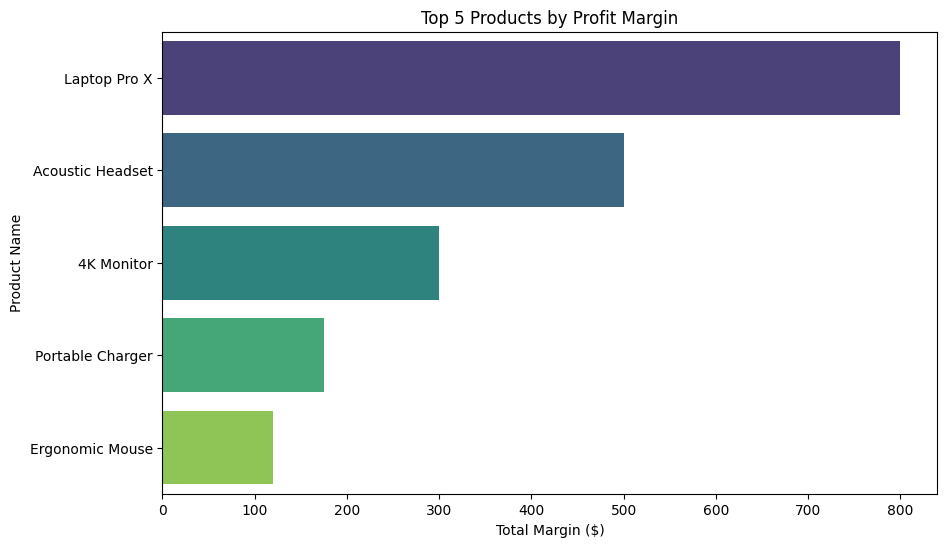

In [14]:
# --- Import the graphing tools first ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Create the Bar Chart ---
plt.figure(figsize=(10, 6)) # Make the chart a good size

# Create the bar plot
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')

# Add labels
plt.title('Top 5 Products by Profit Margin')
plt.xlabel('Total Margin ($)')
plt.ylabel('Product Name')

# Show the chart
plt.show()